In [3]:
from pydna.dseqrecord import Dseqrecord

dsr = Dseqrecord("atgccctaa")
dsr.add_feature()  # a small gene: atgccctaa
dsr.figure()

Dseqrecord(-9)
atgccctaa
tacgggatt

In [4]:
from pydna.design import primer_design

amplicon = primer_design(dsr, limit=3, target_tm=0)
amplicon.figure()

5atg...taa3
       |||
      3att5
5atg3
 |||
3tac...att5

In [5]:
forward_primer = "ccccGGATCC" + amplicon.forward_primer
reverse_primer = "ttttGGATCC" + amplicon.reverse_primer

In [6]:
from pydna.amplify import pcr

pcr_product = pcr(forward_primer, reverse_primer, dsr, limit=3)
pcr_product.figure()

          5atg...taa3
                 |||
                3attCCTAGGtttt5
5ccccGGATCCatg3
           |||
          3tac...att5

In [7]:
Dseqrecord(pcr_product).figure()

Dseqrecord(-29)
ccccGGATCCatgccctaaGGATCCaaaa
ggggCCTAGGtacgggattCCTAGGtttt

In [8]:
from Bio.Restriction import BamHI  # cuts GGATCC

a, b, c = pcr_product.cut(BamHI)

print(a.figure())
print()
print(b.figure())
print()
print(c.figure())

Dseqrecord(-9)
ccccG    
ggggCCTAG

Dseqrecord(-19)
GATCCatgccctaaG    
    GtacgggattCCTAG

Dseqrecord(-9)
GATCCaaaa
    Gtttt


In [9]:
vector = Dseqrecord(
    "aatgtttttccctCCCGGGcaaaatAGATCTtgctatgcatcatcgatct", circular=True, name="vect"
)

In [10]:
vector.figure()

Dseqrecord(o50)
aatgtttttccctCCCGGGcaaaatAGATCTtgctatgcatcatcgatct
ttacaaaaagggaGGGCCCgttttaTCTAGAacgatacgtagtagctaga

In [11]:
from Bio.Restriction import BglII  # cuts AGATCT

linear_vector_bgl = vector.linearize(BglII)

rec_vector = (linear_vector_bgl + b).looped().synced(vector)

rec_vector.figure()

Dseqrecord(o65)
aatgtttttccctCCCGGGcaaaatAGATCCatgccctaaGGATCTtgctatgcatcatcgatct
ttacaaaaagggaGGGCCCgttttaTCTAGGtacgggattCCTAGAacgatacgtagtagctaga

In [12]:
gene2 = Dseqrecord("cctCCCatgaaataaGGGcaa", name="gene2")
gene2.add_feature(6, 15)
gene2.figure()

Dseqrecord(-21)
cctCCCatgaaataaGGGcaa
ggaGGGtactttattCCCgtt

In [13]:
from pydna.assembly import Assembly
from Bio.Restriction import SmaI  # cuts CCCGGG

linear_vector_sma = vector.linearize(SmaI)

asm = Assembly((linear_vector_sma, gene2), limit=6)

candidate, *rest = asm.assemble_circular()

In [14]:
candidate.figure()

 -|vect_lin| 6
|           \/
|           /\
|            6|gene2| 6
|                    \/
|                    /\
|                     6-
|                       |
 -----------------------

In [15]:
candidate = candidate.synced(vector, limit=10)

In [16]:
Dseqrecord(candidate).figure()

Dseqrecord(o59)
aatgtttttccctCCCatgaaataaGGGcaaaatAGATCTtgctatgcatcatcgatct
ttacaaaaagggaGGGtactttattCCCgttttaTCTAGAacgatacgtagtagctaga

In [17]:
from pydna.gel import gel
from pydna.ladders import GeneRuler_1kb_plus

In [18]:
band = Dseqrecord("GATC" * 500)

In [20]:
im = gel(
    [
        GeneRuler_1kb_plus,
        [
            band,
        ],
    ]
)

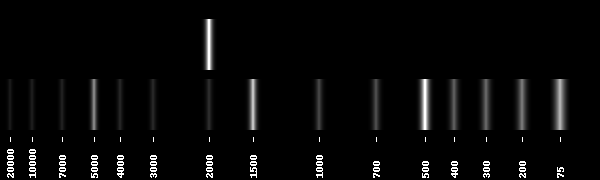

In [22]:
im.rotate(90, expand=1)

In [25]:
from PIL import ImageOps

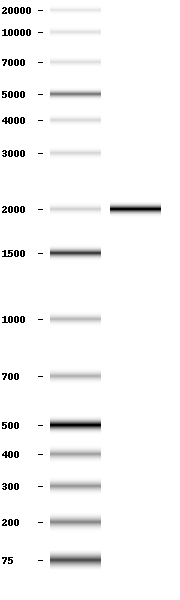

In [26]:
ImageOps.invert(im)